## Reinforcement learning using DQN to play Atari Space invaders.


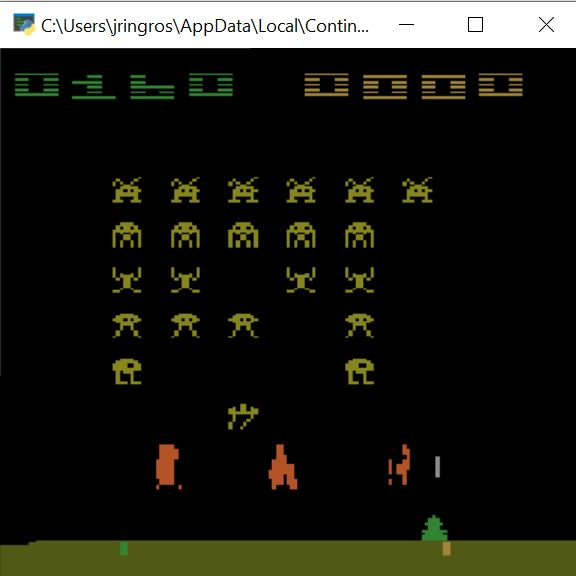

## helpfull links
>https://www.youtube.com/watch?v=hCeJeq8U0lo

>https://gym.openai.com/envs/#atari

>https://colab.research.google.com/github/keras-team/keras-io/blob/master/examples/rl/ipynb/ddpg_pendulum.ipynb#scrollTo=Paf-cnrbZyYN

>https://anaconda.org/conda-forge/gym-atari

>https://deepmind.com/research/publications/2019/playing-atari-deep-reinforcement-learning

In [1]:
import gym


In [2]:
import random


In [3]:
env = gym.make('SpaceInvaders-v0')
height,width,channels= env.observation_space.shape
actions= env.action_space.n


In [4]:
env.unwrapped.get_action_meanings()

['NOOP', 'FIRE', 'RIGHT', 'LEFT', 'RIGHTFIRE', 'LEFTFIRE']

In [7]:
episodes = 5
for episode in range(1, episodes+1):
    state=env.reset()
    done = False
    score = 0
    
    while not done:
        env.render()
        action = random.choice([0,1,2,3,4,5])
        n_state,reward,done, info = env.step(action)
        score += reward
    print('Episode:{} Score:{}'.format(episode,score))
env.close()


Episode:1 Score:410.0
Episode:2 Score:225.0
Episode:3 Score:125.0
Episode:4 Score:105.0
Episode:5 Score:210.0


In [12]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Convolution2D
from tensorflow.keras.optimizers import Adam



In [38]:
def build_model(height,width,channels,actions):
    model=Sequential()
    model.add(Convolution2D(32,(8,8),strides =(4,4),activation='relu', input_shape=(3,height,width,channels)))
    model.add(Convolution2D(64,(4,4),strides =(2,2),activation='relu'))
    model.add(Convolution2D(64,(3,3),activation='relu'))
    model.add(Flatten())
    model.add(Dense(512,activation='relu'))
    model.add(Dense(256,activation='relu'))
    model.add(Dense(actions,activation='linear'))
    return model


In [19]:
del model

NameError: name 'model' is not defined

In [39]:
model = build_model(height,width,channels,actions)

In [21]:
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 3, 51, 39, 32)     6176      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 3, 24, 18, 64)     32832     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 22, 16, 64)     36928     
_________________________________________________________________
flatten (Flatten)            (None, 67584)             0         
_________________________________________________________________
dense (Dense)                (None, 512)               34603520  
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 1

In [23]:
from rl.agents import DQNAgent
from rl.memory import SequentialMemory
from rl.policy import LinearAnnealedPolicy,EpsGreedyQPolicy


In [40]:
def build_agent(model,actions):
    policy = LinearAnnealedPolicy(EpsGreedyQPolicy(),attr='eps', value_max=1,value_min=1,value_test=2, nb_steps=10000)
    memory=  SequentialMemory(limit=1000, window_length=3)
    dqn = DQNAgent(model=model, memory=memory,policy=policy,
                  enable_dueling_network=True,dueling_type='avg',
                  nb_actions=actions,nb_steps_warmup=1000)
    return dqn


use this to reinstansitate model if reloading weights...

dqn = build_agent(model,actions)
dqn.compile(Adam(lr=1e-4))


In [33]:
dqn = build_agent(model,actions)
dqn.compile(Adam(lr=1e-4))
dqn.fit(env, nb_steps=10000,visualize=False, verbose=2)

Training for 10000 steps ...
  594/10000: episode: 1, duration: 22.078s, episode steps: 594, steps per second:  27, episode reward: 50.000, mean reward:  0.084 [ 0.000, 20.000], mean action: 2.386 [0.000, 5.000],  loss: --, mean_q: --, mean_eps: --
 1537/10000: episode: 2, duration: 745.769s, episode steps: 943, steps per second:   1, episode reward: 440.000, mean reward:  0.467 [ 0.000, 200.000], mean action: 2.585 [0.000, 5.000],  loss: 19.980672, mean_q: 14.562011, mean_eps: 1.000000
 2172/10000: episode: 3, duration: 867.509s, episode steps: 635, steps per second:   1, episode reward: 120.000, mean reward:  0.189 [ 0.000, 30.000], mean action: 2.402 [0.000, 5.000],  loss: 1.431974, mean_q: 12.902587, mean_eps: 1.000000
 2829/10000: episode: 4, duration: 855.831s, episode steps: 657, steps per second:   1, episode reward: 135.000, mean reward:  0.205 [ 0.000, 30.000], mean action: 2.482 [0.000, 5.000],  loss: 0.994078, mean_q: 12.485122, mean_eps: 1.000000
 3852/10000: episode: 5, d

In [34]:
scores = dqn.test(env,nb_episodes =10, visualize=True)
print(np.mean(scores.history['episode_reward']))
        

Testing for 10 episodes ...
Episode 1: reward: 85.000, steps: 532
Episode 2: reward: 235.000, steps: 1010
Episode 3: reward: 105.000, steps: 678
Episode 4: reward: 75.000, steps: 725
Episode 5: reward: 195.000, steps: 935
Episode 6: reward: 35.000, steps: 360
Episode 7: reward: 75.000, steps: 711
Episode 8: reward: 385.000, steps: 896
Episode 9: reward: 40.000, steps: 498
Episode 10: reward: 65.000, steps: 616
129.5


In [35]:
dqn.save_weights('Saveweights_10K/Dqb_weights.h5f')


In [36]:
del model, dqn

In [44]:
dqn.load_weights('Saveweights_10K/Dqb_weights.h5f')


In [45]:
scores = dqn.test(env,nb_episodes =10, visualize=True)
print(np.mean(scores.history['episode_reward']))
        

Testing for 10 episodes ...
Episode 1: reward: 265.000, steps: 1022
Episode 2: reward: 110.000, steps: 727
Episode 3: reward: 35.000, steps: 361
Episode 4: reward: 180.000, steps: 660
Episode 5: reward: 190.000, steps: 938
Episode 6: reward: 225.000, steps: 1163
Episode 7: reward: 105.000, steps: 807
Episode 8: reward: 90.000, steps: 526
Episode 9: reward: 225.000, steps: 1166
Episode 10: reward: 80.000, steps: 648
150.5
